The unsupervised learning code of motorcycle crash analysis

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load unclean file
file = 'MotorBike_Accident_analysisUnclean.xlsx'
data = pd.read_excel(file)

In [5]:
# Clean names to keep only the English part of the column names
def clean_column(col):
	return col.split('(')[0].strip()

data.columns = [clean_column(col) for col in data.columns]

# Remove rest of strange languege from the rows
import re
def remove_parentheses(text):
	if isinstance(text, str):
		return re.sub(r'\s*\([^)]*\)', '', text).strip()
	return text

for col_idx, col in enumerate(data.columns):
	if col_idx != 5:  
		data[col] = data[col].apply(remove_parentheses)

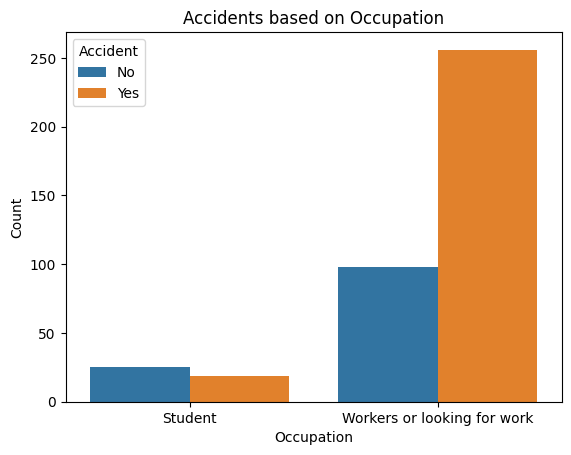

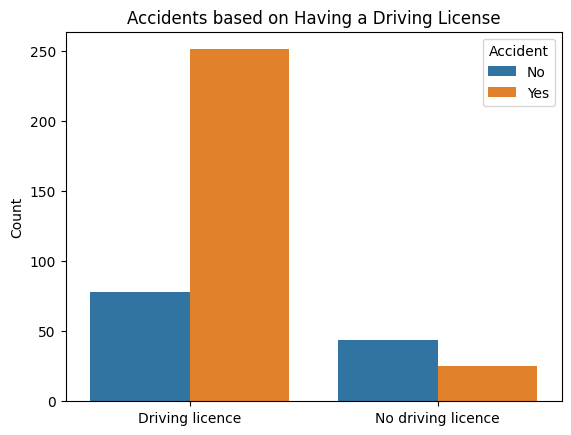

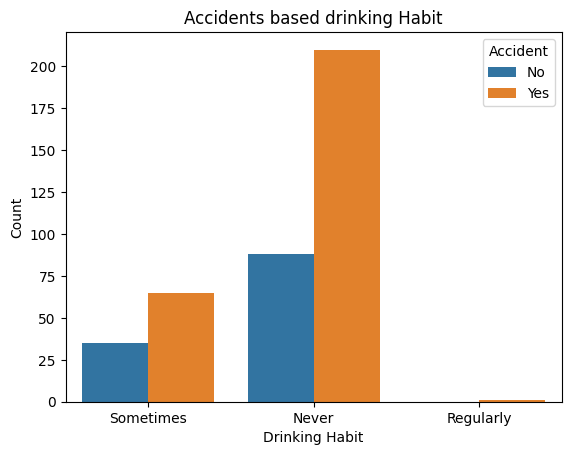

In [6]:
# Simple visualisation of data Based on the before imputed data

# Accidents based on Occupation
sns.countplot(x='6. Occupation', hue='15. Have you faced any road traffic accident over the last one year period?', data=data)
plt.title('Accidents based on Occupation')
plt.legend(title='Accident', labels=['No', 'Yes'])
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.xticks(ticks=[0, 1], labels=['Student', 'Workers or looking for work'])
plt.show()

# Accidents based on having a driving license
sns.countplot(x='11. Do you have riding licence?', hue='15. Have you faced any road traffic accident over the last one year period?', data=data)
plt.title('Accidents based on Having a Driving License')
plt.legend(title='Accident', labels=['No', 'Yes'])
plt.ylabel('Count')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Driving licence', 'No driving licence'])
plt.show()

# Accidents based on Drinking Habit
sns.countplot(x='20. Drinking status', hue='15. Have you faced any road traffic accident over the last one year period?', data=data)
plt.title('Accidents based drinking Habit')
plt.legend(title='Accident', labels=['No', 'Yes'])
plt.ylabel('Count')
plt.xlabel('Drinking Habit')
plt.show()

In [7]:
# Impute missing values

# Encode all categorical variables to numbers
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded_data = encoder.fit_transform(data)

# Impute missing values using RandomForestClassifier
imputer = IterativeImputer(estimator=RandomForestClassifier(), random_state=0)
imputed_encoded = imputer.fit_transform(encoded_data)

# Decode the data back to categories
imputed_data = pd.DataFrame(encoder.inverse_transform(imputed_encoded), columns=data.columns)

# Display rows to see if it worked
print(imputed_data.head())

  1. Gender 2. Living place 3. Age 4. Riding experience 5. Marital status  \
0      Male           Rural  20-29                  1-5         Unmarried   
1      Male           Urban  30-39                  1-5           Married   
2      Male           Rural  20-29                  1-5         Unmarried   
3      Male           Rural  30-39                  1-5           Married   
4      Male           Rural  20-29                11-15         Unmarried   

                                       6. Occupation 7. Education level  \
0                                            Student  Above high school   
1  Others (including workers, office staff, gradu...  Above high school   
2                                            Student  Above high school   
3  Others (including workers, office staff, gradu...  Above high school   
4                                            Student  Above high school   

  8. Employment status 9. Motorcycle's brand name  \
0            Part-time           

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
